In [30]:
%load_ext autoreload
%autoreload 2

import json
import task3
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm.auto import tqdm
from skopt import gp_minimize
from typing import Dict, Tuple
from skopt.space import Integer, Real
from skopt.utils import use_named_args
from skopt.callbacks import Callable
from task3 import ImageDataset, ObjectDetector, Verbosity

QUERY_IMG_DIR = Path("IconDataset", "png")
TEST_IMG_DIR = Path("Task3Dataset", "images")

ANNOTATIONS_DIR = Path("Task3Dataset", "annotations")

# Configure basic logging
logging.basicConfig(level=logging.INFO, format='[%(asctime)s]::[%(levelname)s] %(message)s')
logger = logging.getLogger(__name__)

test_images = ImageDataset(TEST_IMG_DIR, file_ext="png")
query_images = ImageDataset(QUERY_IMG_DIR, file_ext="png")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Impact of Lowe Ratio Test Threshold on Performance Metrics

In [ ]:
results = {}
lowe_threshold_space = [i/100 for i in range(5, 105, 5)]

for lowe_threshold in lowe_threshold_space:
    results[lowe_threshold] = task3.detect_on_dataset(test_images, query_images, ANNOTATIONS_DIR, lowe_threshold=lowe_threshold)

with open("results/varying_lowe_threshold.json", 'w') as f:
    json.dump(results, f, indent=4)

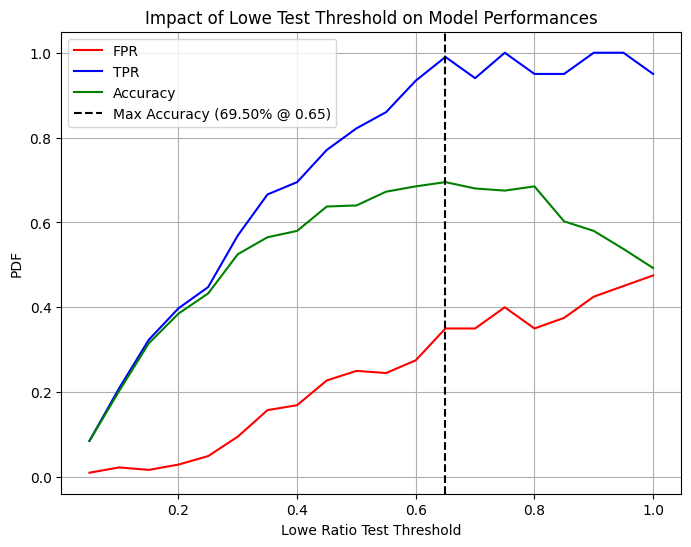

In [29]:
ratios = list(results.keys())
acc = [x[0] for x in results.values()]
tpr = [x[1] for x in results.values()]
fpr = [x[2] for x in results.values()]

max_accuracy = max(acc)
max_ratio = ratios[acc.index(max_accuracy)]

plt.figure(figsize=(8,6))

plt.plot(ratios, fpr, label='FPR', color='red')
plt.plot(ratios, tpr, label='TPR', color='blue')
plt.plot(ratios, acc, label='Accuracy', color='green')
plt.axvline(x=max_ratio, color='black', linestyle='--', label=f'Max Accuracy ({(max_accuracy*100):.2f}% @ {max_ratio:.2f})')

plt.title('Impact of Lowe Test Threshold on Model Performances')
plt.xlabel('Lowe Ratio Test Threshold')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.savefig(fname='plots/varying_lowe_threshold.png')
plt.show()

### Illustrate matchings between an icon and a test image

[2024-04-26 18:27:59,674]::[INFO] 1/20 - Detecting objects in test_image_16
[2024-04-26 18:27:59,827]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:27:59,955]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 11/4. Finding transform...
[2024-04-26 18:28:00,071]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:00,102]::[INFO] No transform found.
[2024-04-26 18:28:00,278]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:00,409]::[INFO] Query image IconDataset/png/002-bike.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:00,439]::[INFO] No transform found.
[2024-04-26 18:28:00,723]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 1

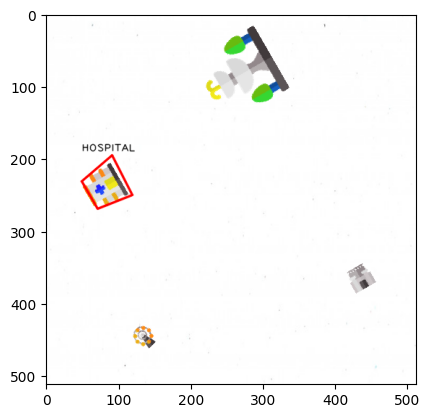

[2024-04-26 18:28:01,476]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 24/4. Finding transform...


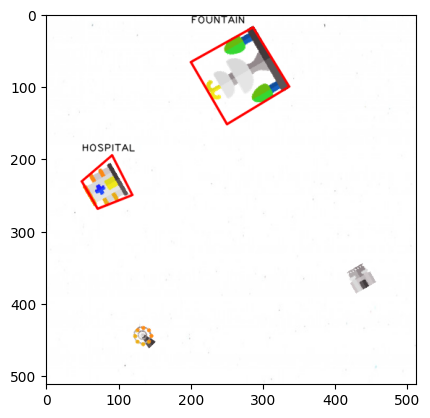

[2024-04-26 18:28:01,753]::[INFO] Query image IconDataset/png/036-hotel.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:01,783]::[INFO] No transform found.
[2024-04-26 18:28:02,029]::[INFO] Query image IconDataset/png/003-bridge-1.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:28:02,209]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 15/4. Finding transform...
[2024-04-26 18:28:02,347]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 17/4. Finding transform...


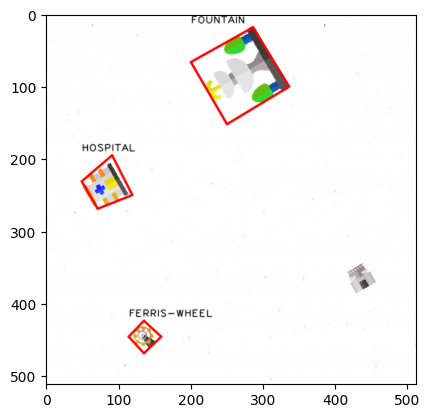

[2024-04-26 18:28:02,448]::[INFO] Query image IconDataset/png/050-cemetery.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:02,546]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 11/4. Finding transform...
[2024-04-26 18:28:02,707]::[INFO] Query image IconDataset/png/042-tractor.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:02,885]::[INFO] Query image IconDataset/png/014-flower.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:02,955]::[INFO] Query image IconDataset/png/005-silo.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:02,985]::[INFO] No transform found.
[2024-04-26 18:28:03,148]::[INFO] Query image IconDataset/png/019-prison.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:03,179]::[INFO] No transform found.


[2024-04-26 18:28:03,243]::[INFO] 2/20 - Detecting objects in test_image_19
[2024-04-26 18:28:03,327]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:03,385]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:03,415]::[INFO] No transform found.
[2024-04-26 18:28:03,496]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 20/4. Finding transform...
[2024-04-26 18:28:03,600]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:28:03,654]::[INFO] Query image IconDataset/png/006-church.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:03,685]::[INFO] No transform found.
[2024-04-26 18:28:03,735]::[INFO] Query image IconDataset/png/040-bus-stop.png yields enough good matches - 9/4. Finding transform...
[2024-04-26

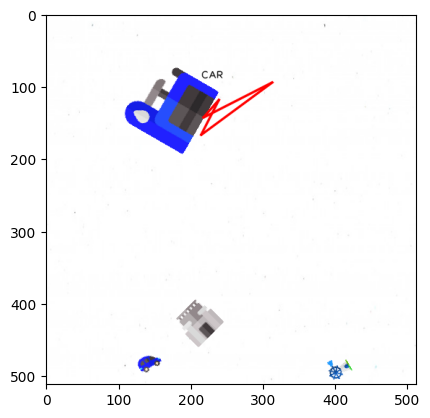

[2024-04-26 18:28:04,988]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 13/4. Finding transform...
[2024-04-26 18:28:05,050]::[INFO] Query image IconDataset/png/035-police.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:28:05,130]::[INFO] Query image IconDataset/png/027-gas-station.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:05,160]::[INFO] No transform found.
[2024-04-26 18:28:05,206]::[INFO] Query image IconDataset/png/031-field.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:05,264]::[INFO] Query image IconDataset/png/036-hotel.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:05,295]::[INFO] No transform found.
[2024-04-26 18:28:05,388]::[INFO] Query image IconDataset/png/038-library.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:05,455]::[INFO] Query image IconDataset/png/018-bank.png yields enough goo

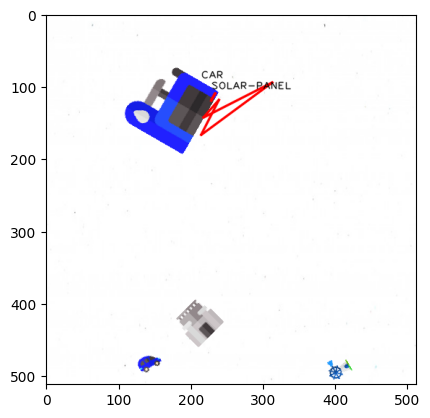

[2024-04-26 18:28:05,904]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:28:06,009]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 13/4. Finding transform...
[2024-04-26 18:28:06,059]::[INFO] Query image IconDataset/png/032-van.png yields enough good matches - 11/4. Finding transform...
[2024-04-26 18:28:06,161]::[INFO] Query image IconDataset/png/042-tractor.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:06,239]::[INFO] Query image IconDataset/png/010-bench.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:06,269]::[INFO] No transform found.
[2024-04-26 18:28:06,372]::[INFO] Query image IconDataset/png/014-flower.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:06,426]::[INFO] Query image IconDataset/png/005-silo.png yields enough good matches - 5/4. Finding transform...
[2024-04-

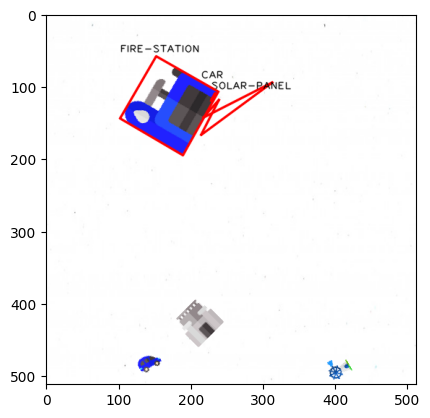

[2024-04-26 18:28:06,661]::[INFO] Query image IconDataset/png/019-prison.png yields enough good matches - 11/4. Finding transform...
[2024-04-26 18:28:06,729]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 7/4. Finding transform...


[2024-04-26 18:28:06,743]::[INFO] 3/20 - Detecting objects in test_image_18
[2024-04-26 18:28:06,909]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:06,939]::[INFO] No transform found.
[2024-04-26 18:28:07,172]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 35/4. Finding transform...


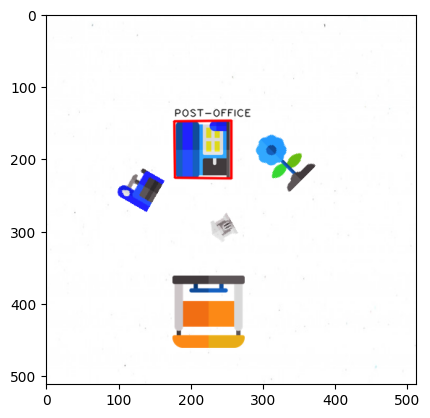

[2024-04-26 18:28:07,347]::[INFO] Query image IconDataset/png/040-bus-stop.png yields enough good matches - 11/4. Finding transform...


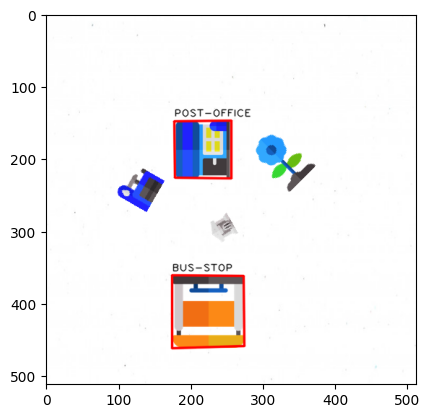

[2024-04-26 18:28:07,537]::[INFO] Query image IconDataset/png/012-bus.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:07,568]::[INFO] No transform found.
[2024-04-26 18:28:08,045]::[INFO] Query image IconDataset/png/004-bridge.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:08,211]::[INFO] Query image IconDataset/png/049-school.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:28:08,589]::[INFO] Query image IconDataset/png/015-barn.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:09,079]::[INFO] Query image IconDataset/png/038-library.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:09,268]::[INFO] Query image IconDataset/png/003-bridge-1.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:09,364]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:09

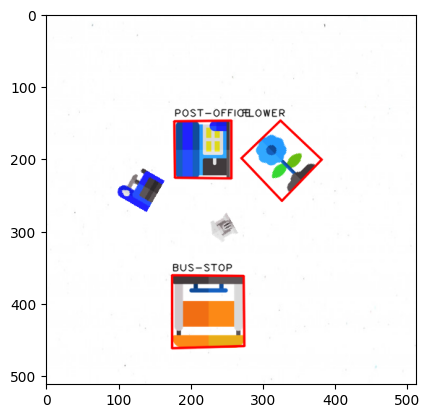

[2024-04-26 18:28:10,300]::[INFO] Query image IconDataset/png/046-fire-station.png yields enough good matches - 7/4. Finding transform...


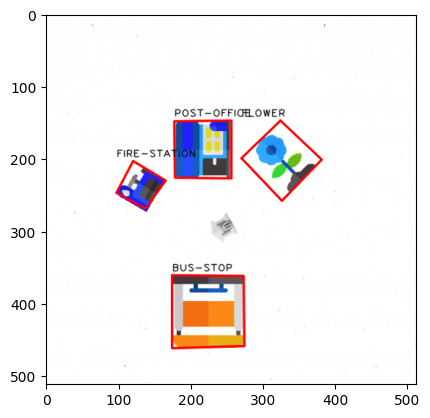

[2024-04-26 18:28:10,553]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:10,583]::[INFO] No transform found.


[2024-04-26 18:28:10,587]::[INFO] 4/20 - Detecting objects in test_image_12
[2024-04-26 18:28:10,679]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:28:10,747]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:10,927]::[INFO] Query image IconDataset/png/025-factory.png yields enough good matches - 13/4. Finding transform...


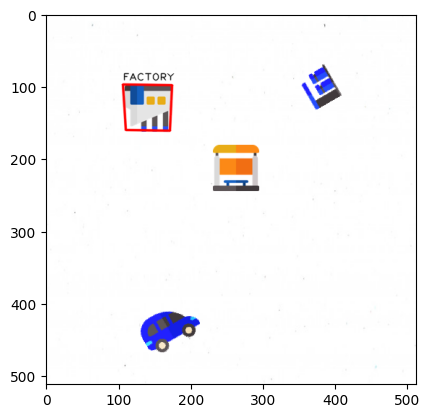

[2024-04-26 18:28:11,163]::[INFO] Query image IconDataset/png/040-bus-stop.png yields enough good matches - 15/4. Finding transform...


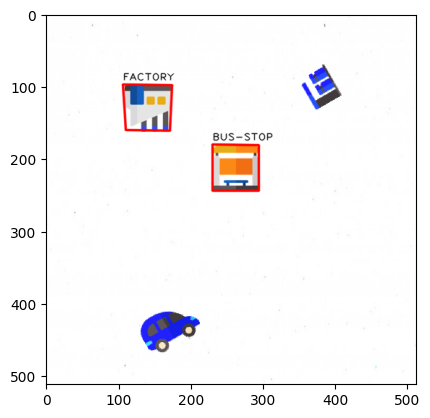

[2024-04-26 18:28:11,287]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:11,318]::[INFO] No transform found.
[2024-04-26 18:28:11,373]::[INFO] Query image IconDataset/png/012-bus.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:11,404]::[INFO] No transform found.
[2024-04-26 18:28:11,535]::[INFO] Query image IconDataset/png/028-government.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:11,590]::[INFO] Query image IconDataset/png/043-sign.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:11,713]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:11,745]::[INFO] No transform found.
[2024-04-26 18:28:11,813]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:11,924]::[INFO] Query 

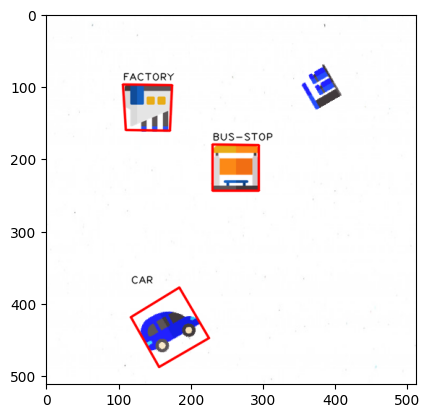

[2024-04-26 18:28:12,514]::[INFO] Query image IconDataset/png/015-barn.png yields enough good matches - 49/4. Finding transform...
[2024-04-26 18:28:12,640]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:12,794]::[INFO] Query image IconDataset/png/027-gas-station.png yields enough good matches - 19/4. Finding transform...


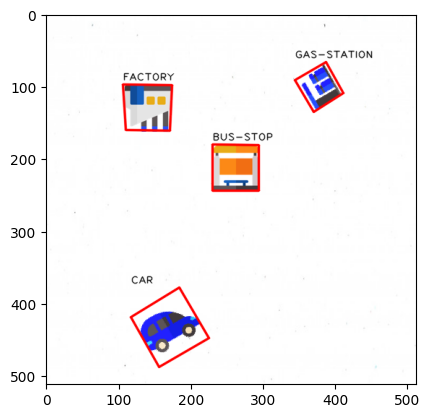

[2024-04-26 18:28:12,956]::[INFO] Query image IconDataset/png/036-hotel.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:12,987]::[INFO] No transform found.
[2024-04-26 18:28:13,303]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:13,434]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 43/4. Finding transform...
[2024-04-26 18:28:13,579]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 14/4. Finding transform...
[2024-04-26 18:28:13,803]::[INFO] Query image IconDataset/png/039-university.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:13,833]::[INFO] No transform found.
[2024-04-26 18:28:14,060]::[INFO] Query image IconDataset/png/014-flower.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:14,090]::[INFO] No transform found.
[2024-04-26 18:28:14,149]::

[2024-04-26 18:28:14,451]::[INFO] 5/20 - Detecting objects in test_image_3
[2024-04-26 18:28:14,632]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:28:15,518]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:15,549]::[INFO] No transform found.
[2024-04-26 18:28:16,098]::[INFO] Query image IconDataset/png/011-trash.png yields enough good matches - 9/4. Finding transform...


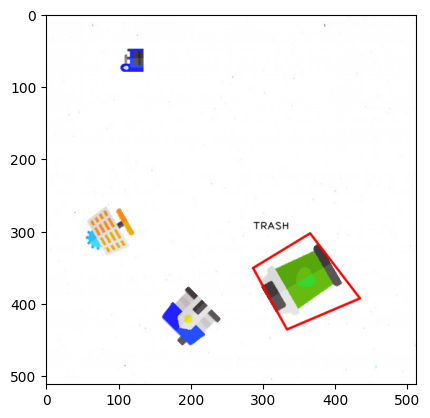

[2024-04-26 18:28:16,434]::[INFO] Query image IconDataset/png/048-hospital.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:16,465]::[INFO] No transform found.
[2024-04-26 18:28:16,545]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:16,575]::[INFO] No transform found.
[2024-04-26 18:28:17,363]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 77/4. Finding transform...


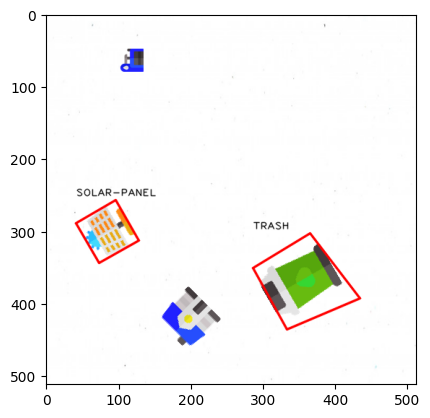

[2024-04-26 18:28:17,490]::[INFO] Query image IconDataset/png/016-house.png yields enough good matches - 8/4. Finding transform...


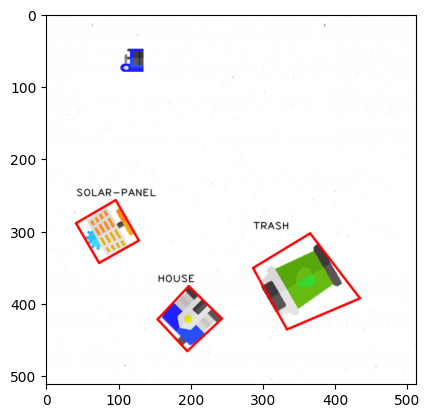

[2024-04-26 18:28:17,665]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:17,695]::[INFO] No transform found.
[2024-04-26 18:28:18,363]::[INFO] Query image IconDataset/png/046-fire-station.png yields enough good matches - 6/4. Finding transform...


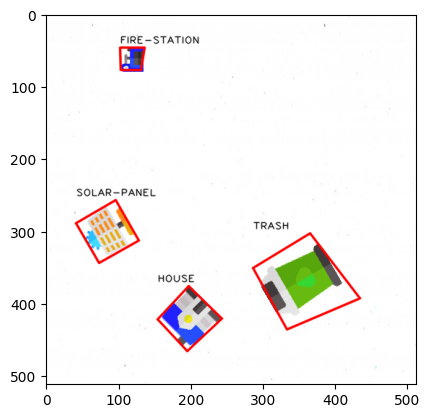

[2024-04-26 18:28:18,651]::[INFO] 6/20 - Detecting objects in test_image_4
[2024-04-26 18:28:18,916]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 13/4. Finding transform...
[2024-04-26 18:28:18,972]::[INFO] Query image IconDataset/png/025-factory.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:19,071]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:19,193]::[INFO] Query image IconDataset/png/040-bus-stop.png yields enough good matches - 16/4. Finding transform...


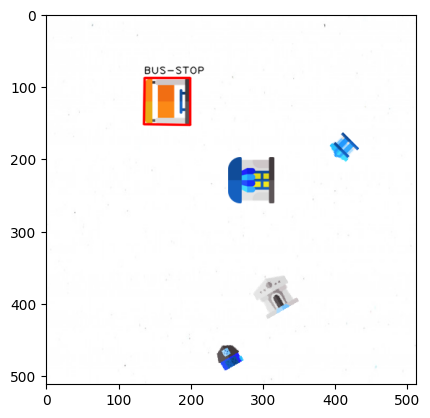

[2024-04-26 18:28:19,317]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 35/4. Finding transform...


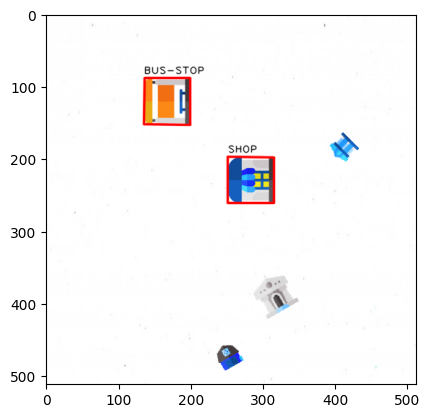

[2024-04-26 18:28:19,505]::[INFO] Query image IconDataset/png/002-bike.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:19,742]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 16/4. Finding transform...


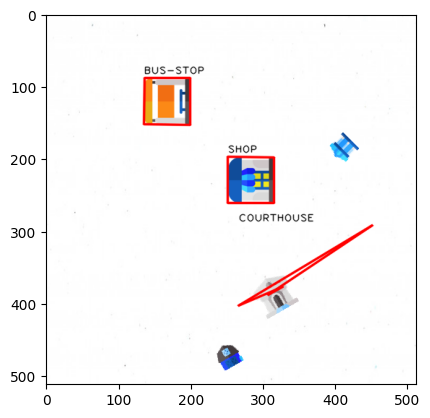

[2024-04-26 18:28:19,905]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:19,935]::[INFO] No transform found.
[2024-04-26 18:28:20,297]::[INFO] Query image IconDataset/png/013-water-well.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:28:20,509]::[INFO] Query image IconDataset/png/015-barn.png yields enough good matches - 8/4. Finding transform...


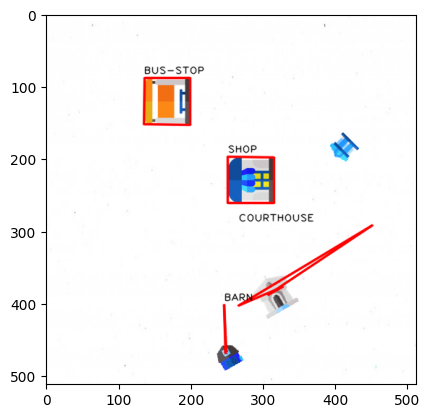

[2024-04-26 18:28:20,820]::[INFO] Query image IconDataset/png/048-hospital.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:20,850]::[INFO] No transform found.
[2024-04-26 18:28:20,985]::[INFO] Query image IconDataset/png/035-police.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:21,015]::[INFO] No transform found.
[2024-04-26 18:28:21,494]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:21,524]::[INFO] No transform found.
[2024-04-26 18:28:21,648]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 20/4. Finding transform...
[2024-04-26 18:28:21,699]::[INFO] Query image IconDataset/png/016-house.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:21,729]::[INFO] No transform found.
[2024-04-26 18:28:21,822]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 4/

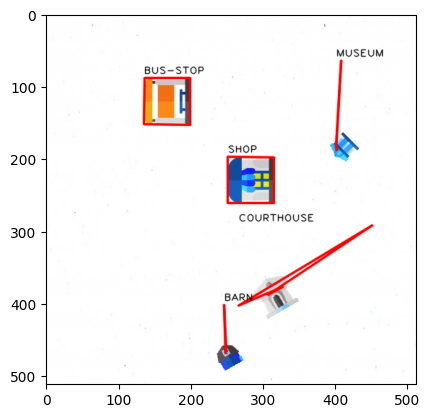

[2024-04-26 18:28:22,686]::[INFO] 7/20 - Detecting objects in test_image_13
[2024-04-26 18:28:24,369]::[INFO] Query image IconDataset/png/015-barn.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:24,695]::[INFO] Query image IconDataset/png/031-field.png yields enough good matches - 17/4. Finding transform...


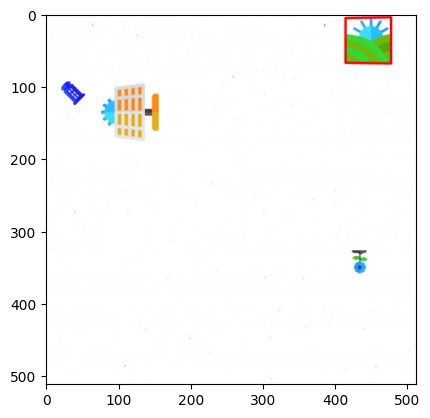

[2024-04-26 18:28:25,302]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 87/4. Finding transform...


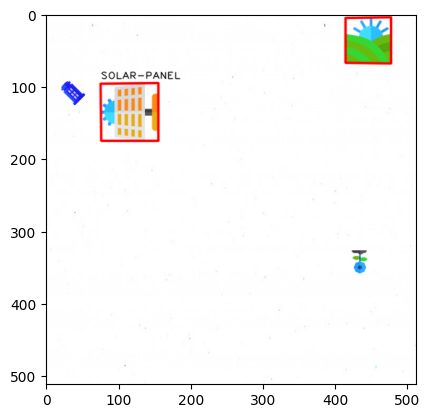

[2024-04-26 18:28:25,663]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:26,038]::[INFO] Query image IconDataset/png/014-flower.png yields enough good matches - 10/4. Finding transform...


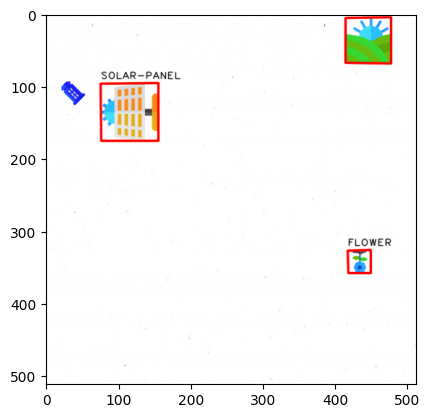

[2024-04-26 18:28:26,417]::[INFO] 8/20 - Detecting objects in test_image_6
[2024-04-26 18:28:26,518]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:26,548]::[INFO] No transform found.
[2024-04-26 18:28:26,622]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 11/4. Finding transform...


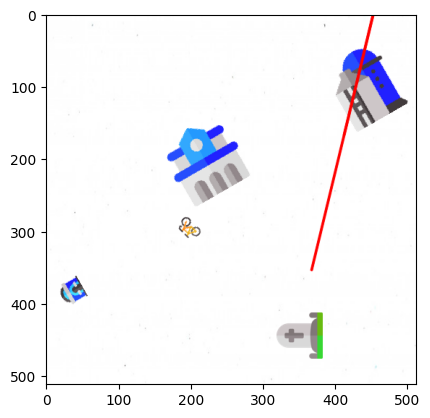

[2024-04-26 18:28:26,810]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 15/4. Finding transform...
[2024-04-26 18:28:26,870]::[INFO] Query image IconDataset/png/025-factory.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:26,900]::[INFO] No transform found.
[2024-04-26 18:28:26,977]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:27,008]::[INFO] No transform found.
[2024-04-26 18:28:27,138]::[INFO] Query image IconDataset/png/040-bus-stop.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:27,169]::[INFO] No transform found.
[2024-04-26 18:28:27,248]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:28:27,394]::[INFO] Query image IconDataset/png/002-bike.png yields enough good matches - 12/4. Finding transform...


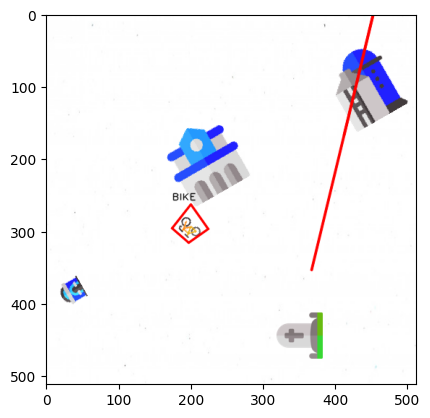

[2024-04-26 18:28:27,548]::[INFO] Query image IconDataset/png/028-government.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:27,580]::[INFO] No transform found.
[2024-04-26 18:28:27,636]::[INFO] Query image IconDataset/png/043-sign.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:27,668]::[INFO] No transform found.
[2024-04-26 18:28:27,728]::[INFO] Query image IconDataset/png/023-traffic-light.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:27,758]::[INFO] No transform found.
[2024-04-26 18:28:27,830]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:27,940]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:27,972]::[INFO] No transform found.
[2024-04-26 18:28:28,129]::[INFO] Query image IconDataset/png/029-theater.png yields enough good matches -

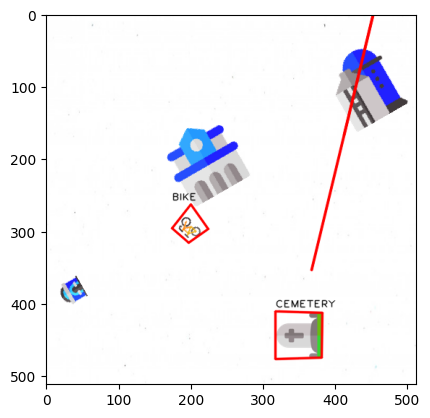

[2024-04-26 18:28:30,249]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 11/4. Finding transform...
[2024-04-26 18:28:30,311]::[INFO] Query image IconDataset/png/032-van.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:30,400]::[INFO] Query image IconDataset/png/039-university.png yields enough good matches - 12/4. Finding transform...


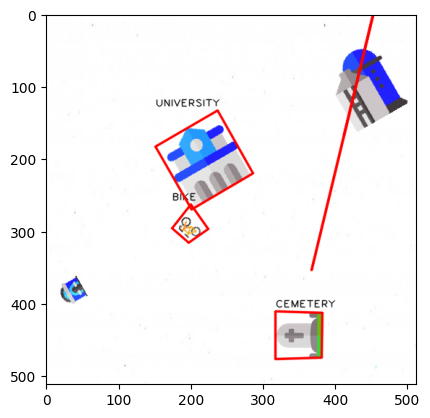

[2024-04-26 18:28:30,600]::[INFO] Query image IconDataset/png/010-bench.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:30,767]::[INFO] Query image IconDataset/png/014-flower.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:30,799]::[INFO] No transform found.
[2024-04-26 18:28:30,867]::[INFO] Query image IconDataset/png/005-silo.png yields enough good matches - 32/4. Finding transform...


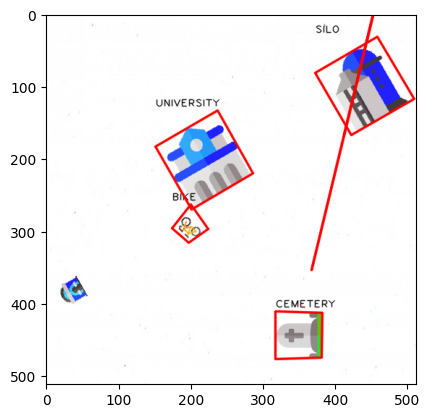

[2024-04-26 18:28:31,112]::[INFO] Query image IconDataset/png/019-prison.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:31,143]::[INFO] No transform found.
[2024-04-26 18:28:31,214]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 11/4. Finding transform...


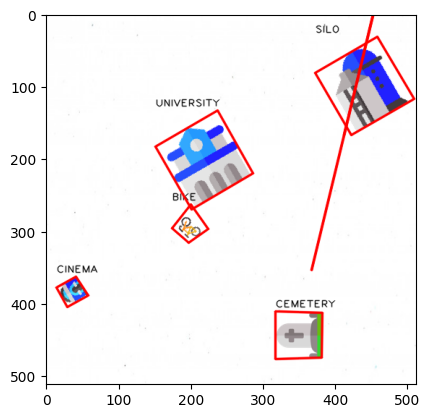

[2024-04-26 18:28:31,303]::[INFO] 9/20 - Detecting objects in test_image_17
[2024-04-26 18:28:31,393]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:31,456]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:28:31,552]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 18/4. Finding transform...
[2024-04-26 18:28:31,604]::[INFO] Query image IconDataset/png/025-factory.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:31,636]::[INFO] No transform found.
[2024-04-26 18:28:31,698]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:31,784]::[INFO] Query image IconDataset/png/006-church.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:31,868]::[INFO] Query image IconDataset/png/040-

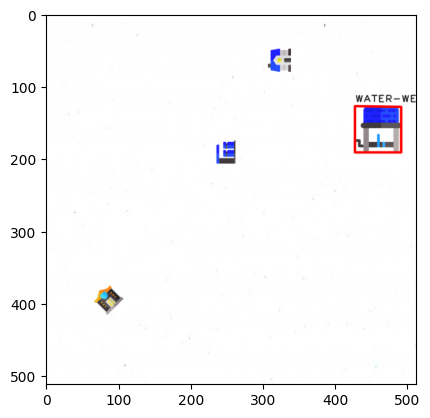

[2024-04-26 18:28:32,891]::[INFO] Query image IconDataset/png/011-trash.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:32,945]::[INFO] Query image IconDataset/png/022-car.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:33,067]::[INFO] Query image IconDataset/png/015-barn.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:33,134]::[INFO] Query image IconDataset/png/048-hospital.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:33,228]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 14/4. Finding transform...
[2024-04-26 18:28:33,294]::[INFO] Query image IconDataset/png/035-police.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:28:33,377]::[INFO] Query image IconDataset/png/027-gas-station.png yields enough good matches - 12/4. Finding transform...


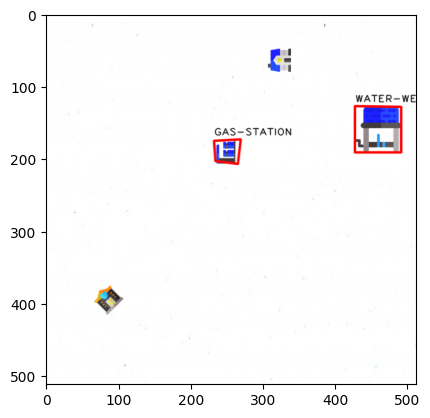

[2024-04-26 18:28:33,537]::[INFO] Query image IconDataset/png/036-hotel.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:33,670]::[INFO] Query image IconDataset/png/038-library.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:33,810]::[INFO] Query image IconDataset/png/003-bridge-1.png yields enough good matches - 14/4. Finding transform...
[2024-04-26 18:28:33,868]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:28:33,986]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 27/4. Finding transform...
[2024-04-26 18:28:34,034]::[INFO] Query image IconDataset/png/016-house.png yields enough good matches - 12/4. Finding transform...


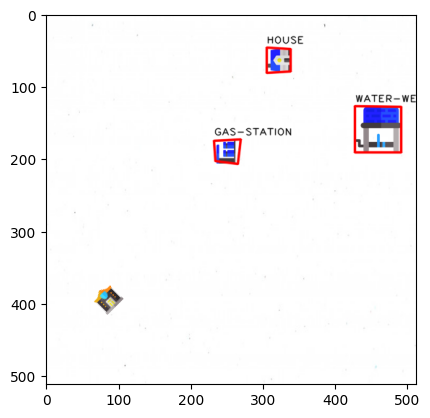

[2024-04-26 18:28:34,194]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 28/4. Finding transform...
[2024-04-26 18:28:34,240]::[INFO] Query image IconDataset/png/050-cemetery.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:34,271]::[INFO] No transform found.
[2024-04-26 18:28:34,336]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 13/4. Finding transform...
[2024-04-26 18:28:34,388]::[INFO] Query image IconDataset/png/032-van.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:34,468]::[INFO] Query image IconDataset/png/039-university.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:34,528]::[INFO] Query image IconDataset/png/042-tractor.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:34,636]::[INFO] Query image IconDataset/png/001-lighthouse.png yields enough good matches - 5/4. Finding transform.

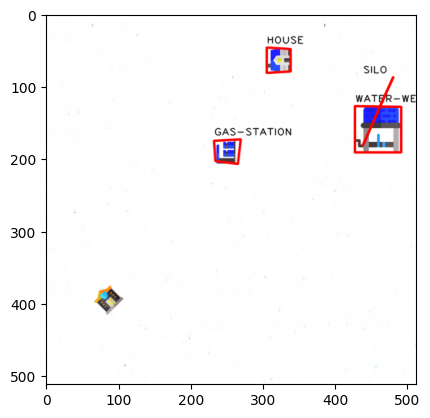

[2024-04-26 18:28:34,964]::[INFO] Query image IconDataset/png/045-museum.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:35,093]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 10/4. Finding transform...


[2024-04-26 18:28:35,100]::[INFO] 10/20 - Detecting objects in test_image_2
[2024-04-26 18:28:35,194]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:35,267]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:28:35,710]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:35,741]::[INFO] No transform found.
[2024-04-26 18:28:35,868]::[INFO] Query image IconDataset/png/002-bike.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:35,898]::[INFO] No transform found.
[2024-04-26 18:28:36,128]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 18/4. Finding transform...


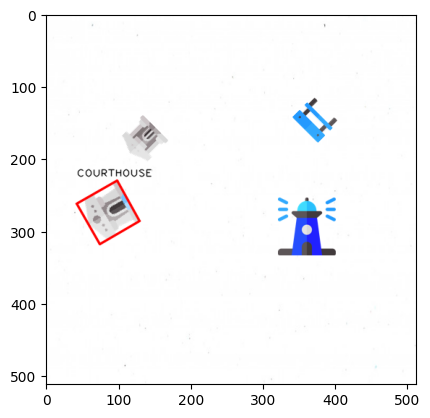

[2024-04-26 18:28:36,254]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:36,284]::[INFO] No transform found.
[2024-04-26 18:28:36,424]::[INFO] Query image IconDataset/png/029-theater.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:36,454]::[INFO] No transform found.
[2024-04-26 18:28:36,589]::[INFO] Query image IconDataset/png/047-restaurant.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:37,031]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:28:37,263]::[INFO] Query image IconDataset/png/036-hotel.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:37,293]::[INFO] No transform found.
[2024-04-26 18:28:37,474]::[INFO] Query image IconDataset/png/018-bank.png yields enough good matches - 16/4. Finding transform...


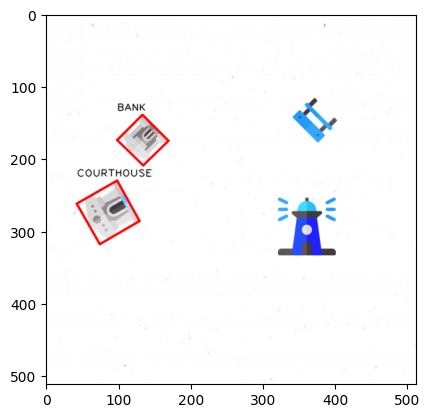

[2024-04-26 18:28:37,608]::[INFO] Query image IconDataset/png/003-bridge-1.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:37,640]::[INFO] No transform found.
[2024-04-26 18:28:37,702]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:37,732]::[INFO] No transform found.
[2024-04-26 18:28:37,862]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 21/4. Finding transform...
[2024-04-26 18:28:38,009]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:38,325]::[INFO] Query image IconDataset/png/042-tractor.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:28:38,398]::[INFO] Query image IconDataset/png/010-bench.png yields enough good matches - 7/4. Finding transform...


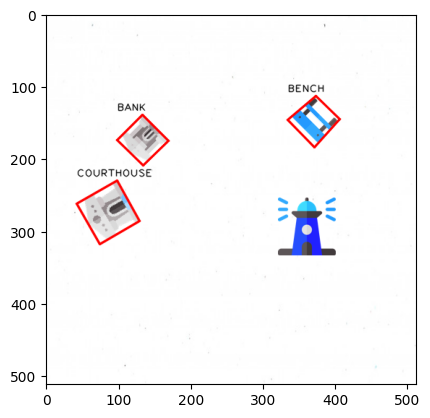

[2024-04-26 18:28:38,512]::[INFO] Query image IconDataset/png/001-lighthouse.png yields enough good matches - 28/4. Finding transform...


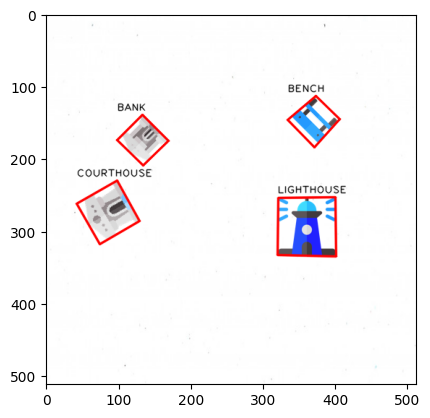

[2024-04-26 18:28:38,632]::[INFO] Query image IconDataset/png/014-flower.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:38,933]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:38,963]::[INFO] No transform found.


[2024-04-26 18:28:38,967]::[INFO] 11/20 - Detecting objects in test_image_5
[2024-04-26 18:28:39,266]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 48/4. Finding transform...


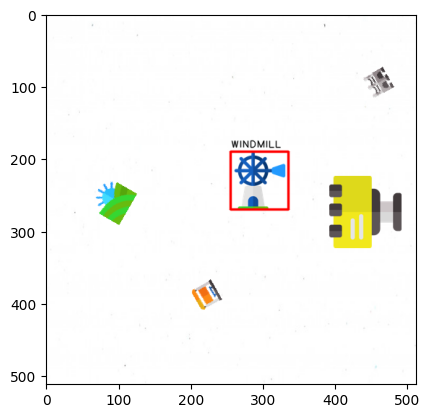

[2024-04-26 18:28:39,522]::[INFO] Query image IconDataset/png/006-church.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:39,553]::[INFO] No transform found.
[2024-04-26 18:28:39,696]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:39,869]::[INFO] Query image IconDataset/png/002-bike.png yields enough good matches - 5/4. Finding transform...


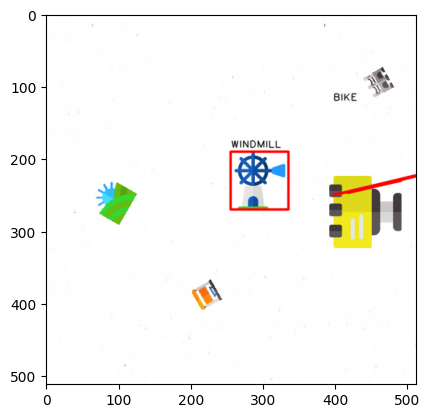

[2024-04-26 18:28:40,291]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:40,480]::[INFO] Query image IconDataset/png/029-theater.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:40,511]::[INFO] No transform found.
[2024-04-26 18:28:40,669]::[INFO] Query image IconDataset/png/047-restaurant.png yields enough good matches - 8/4. Finding transform...


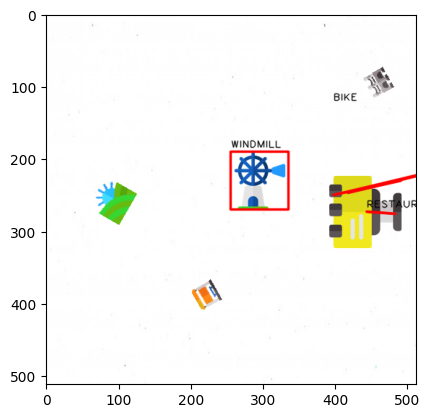

[2024-04-26 18:28:41,227]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:41,258]::[INFO] No transform found.
[2024-04-26 18:28:41,336]::[INFO] Query image IconDataset/png/035-police.png yields enough good matches - 6/4. Finding transform...


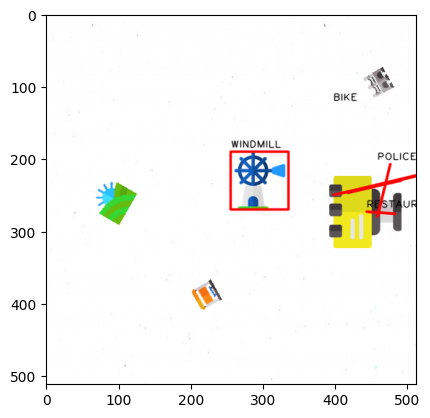

[2024-04-26 18:28:41,541]::[INFO] Query image IconDataset/png/031-field.png yields enough good matches - 11/4. Finding transform...


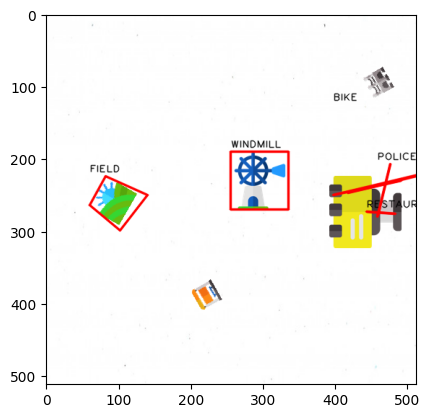

[2024-04-26 18:28:41,791]::[INFO] Query image IconDataset/png/038-library.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:41,823]::[INFO] No transform found.
[2024-04-26 18:28:42,064]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 26/4. Finding transform...


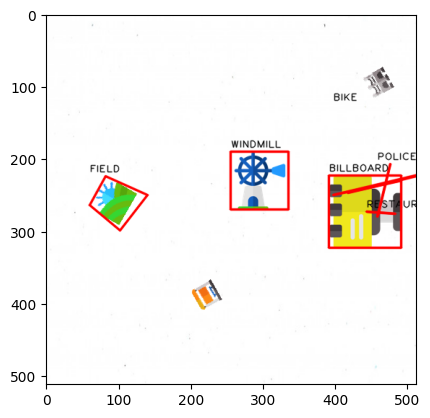

[2024-04-26 18:28:42,276]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 15/4. Finding transform...
[2024-04-26 18:28:42,835]::[INFO] Query image IconDataset/png/010-bench.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:42,866]::[INFO] No transform found.
[2024-04-26 18:28:43,179]::[INFO] Query image IconDataset/png/045-museum.png yields enough good matches - 8/4. Finding transform...


[2024-04-26 18:28:43,366]::[INFO] 12/20 - Detecting objects in test_image_15
[2024-04-26 18:28:43,467]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:43,499]::[INFO] No transform found.
[2024-04-26 18:28:43,573]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:43,832]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:43,863]::[INFO] No transform found.
[2024-04-26 18:28:44,129]::[INFO] Query image IconDataset/png/012-bus.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:44,161]::[INFO] No transform found.
[2024-04-26 18:28:44,500]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 10/4. Finding transform...


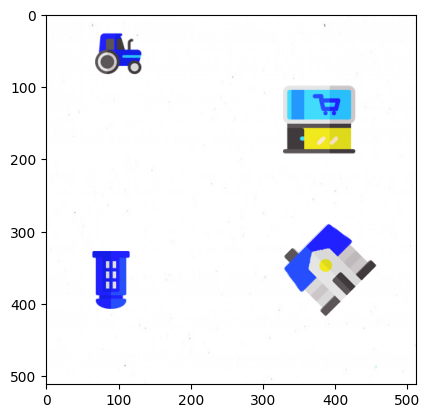

[2024-04-26 18:28:44,635]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 36/4. Finding transform...


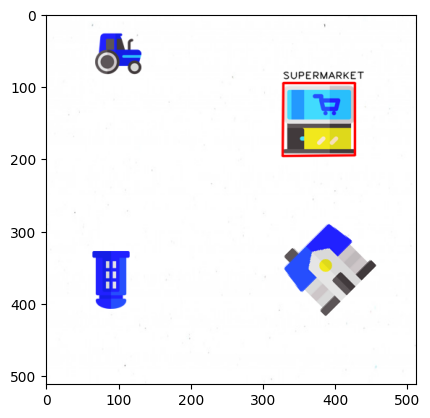

[2024-04-26 18:28:44,995]::[INFO] Query image IconDataset/png/047-restaurant.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:45,025]::[INFO] No transform found.
[2024-04-26 18:28:45,407]::[INFO] Query image IconDataset/png/048-hospital.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:45,437]::[INFO] No transform found.
[2024-04-26 18:28:45,646]::[INFO] Query image IconDataset/png/027-gas-station.png yields enough good matches - 5/4. Finding transform...


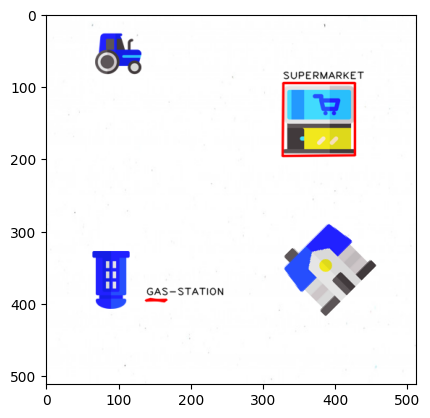

[2024-04-26 18:28:45,846]::[INFO] Query image IconDataset/png/036-hotel.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:45,876]::[INFO] No transform found.
[2024-04-26 18:28:46,428]::[INFO] Query image IconDataset/png/016-house.png yields enough good matches - 10/4. Finding transform...


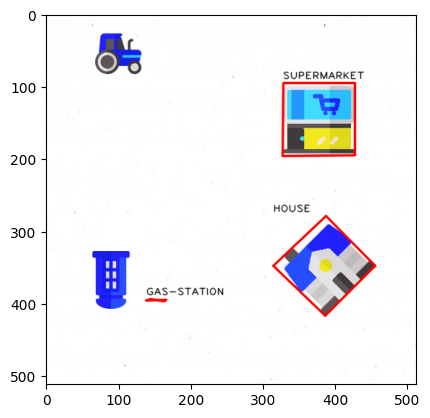

[2024-04-26 18:28:46,594]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:46,625]::[INFO] No transform found.
[2024-04-26 18:28:46,676]::[INFO] Query image IconDataset/png/050-cemetery.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:46,707]::[INFO] No transform found.
[2024-04-26 18:28:46,784]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 38/4. Finding transform...


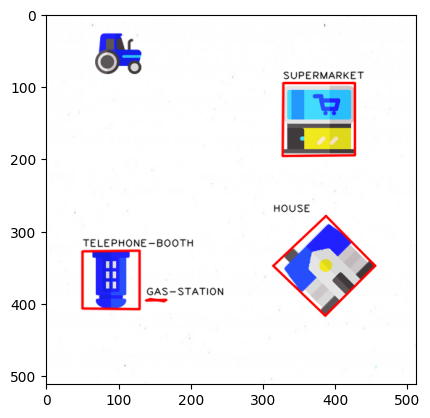

[2024-04-26 18:28:47,018]::[INFO] Query image IconDataset/png/042-tractor.png yields enough good matches - 21/4. Finding transform...


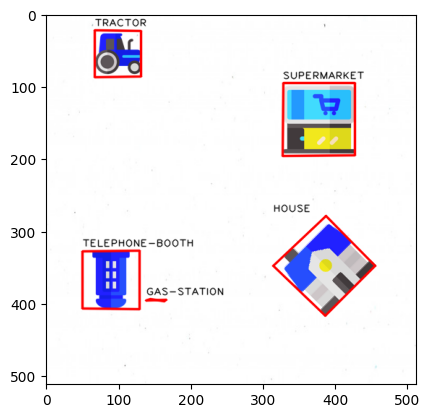

[2024-04-26 18:28:47,513]::[INFO] Query image IconDataset/png/019-prison.png yields enough good matches - 8/4. Finding transform...


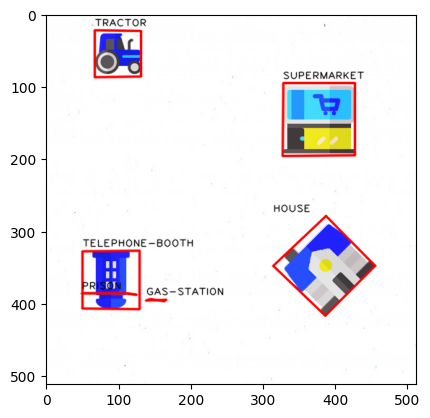

[2024-04-26 18:28:47,646]::[INFO] 13/20 - Detecting objects in test_image_9
[2024-04-26 18:28:47,729]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:47,789]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 13/4. Finding transform...
[2024-04-26 18:28:47,869]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:48,050]::[INFO] Query image IconDataset/png/006-church.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:48,081]::[INFO] No transform found.
[2024-04-26 18:28:48,186]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:48,218]::[INFO] No transform found.
[2024-04-26 18:28:48,321]::[INFO] Query image IconDataset/png/002-bike.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:48,35

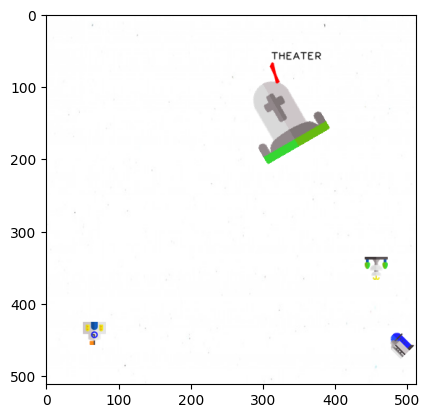

[2024-04-26 18:28:48,922]::[INFO] Query image IconDataset/png/049-school.png yields enough good matches - 9/4. Finding transform...


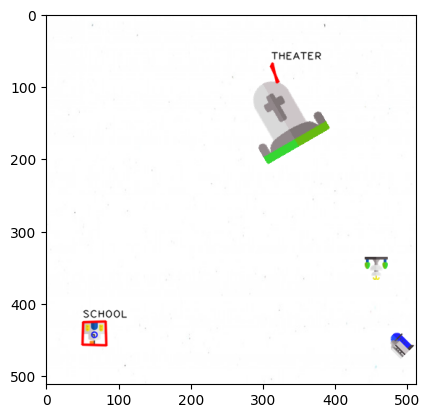

[2024-04-26 18:28:49,061]::[INFO] Query image IconDataset/png/047-restaurant.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:49,091]::[INFO] No transform found.
[2024-04-26 18:28:49,156]::[INFO] Query image IconDataset/png/013-water-well.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:49,186]::[INFO] No transform found.
[2024-04-26 18:28:49,229]::[INFO] Query image IconDataset/png/011-trash.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:49,260]::[INFO] No transform found.
[2024-04-26 18:28:49,432]::[INFO] Query image IconDataset/png/048-hospital.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:49,499]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:28:49,911]::[INFO] Query image IconDataset/png/003-bridge-1.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:49,994]::[INFO

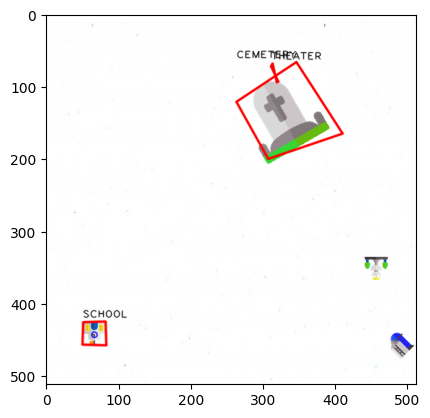

[2024-04-26 18:28:50,398]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:28:50,446]::[INFO] Query image IconDataset/png/032-van.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:50,478]::[INFO] No transform found.
[2024-04-26 18:28:50,522]::[INFO] Query image IconDataset/png/039-university.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:50,770]::[INFO] Query image IconDataset/png/005-silo.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:50,995]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 9/4. Finding transform...


[2024-04-26 18:28:51,029]::[INFO] 14/20 - Detecting objects in test_image_1
[2024-04-26 18:28:51,380]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:51,490]::[INFO] Query image IconDataset/png/040-bus-stop.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:51,521]::[INFO] No transform found.
[2024-04-26 18:28:51,755]::[INFO] Query image IconDataset/png/028-government.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:51,785]::[INFO] No transform found.
[2024-04-26 18:28:51,942]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:51,974]::[INFO] No transform found.
[2024-04-26 18:28:52,110]::[INFO] Query image IconDataset/png/004-bridge.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:52,316]::[INFO] Query image IconDataset/png/047-restaurant.png yields

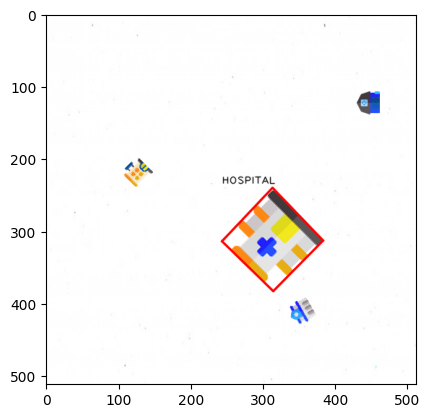

[2024-04-26 18:28:52,902]::[INFO] Query image IconDataset/png/035-police.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:53,085]::[INFO] Query image IconDataset/png/036-hotel.png yields enough good matches - 10/4. Finding transform...


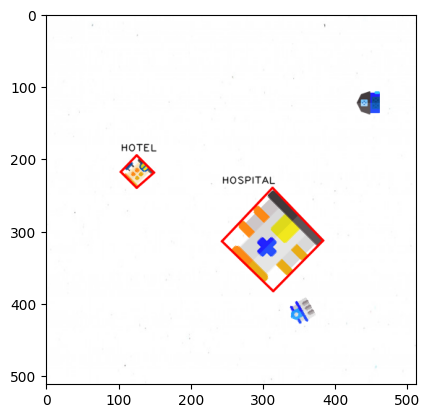

[2024-04-26 18:28:53,244]::[INFO] Query image IconDataset/png/038-library.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:53,341]::[INFO] Query image IconDataset/png/018-bank.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:53,372]::[INFO] No transform found.
[2024-04-26 18:28:53,441]::[INFO] Query image IconDataset/png/003-bridge-1.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:53,529]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:53,559]::[INFO] No transform found.
[2024-04-26 18:28:53,670]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 35/4. Finding transform...
[2024-04-26 18:28:54,006]::[INFO] Query image IconDataset/png/039-university.png yields enough good matches - 11/4. Finding transform...


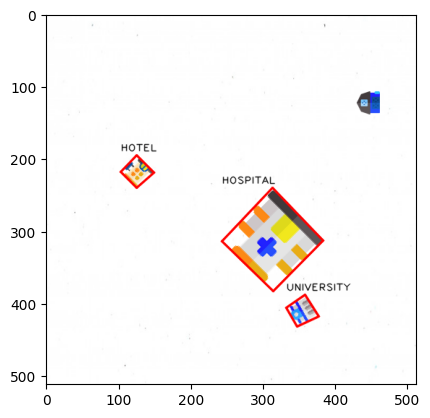

[2024-04-26 18:28:54,179]::[INFO] Query image IconDataset/png/010-bench.png yields enough good matches - 13/4. Finding transform...
[2024-04-26 18:28:54,442]::[INFO] Query image IconDataset/png/045-museum.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:54,536]::[INFO] Query image IconDataset/png/019-prison.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:54,625]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:54,657]::[INFO] No transform found.


[2024-04-26 18:28:54,660]::[INFO] 15/20 - Detecting objects in test_image_10
[2024-04-26 18:28:54,765]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:55,118]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 37/4. Finding transform...


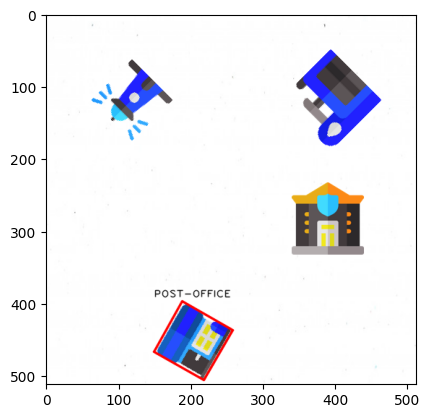

[2024-04-26 18:28:55,311]::[INFO] Query image IconDataset/png/040-bus-stop.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:28:55,488]::[INFO] Query image IconDataset/png/012-bus.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:55,519]::[INFO] No transform found.
[2024-04-26 18:28:55,680]::[INFO] Query image IconDataset/png/028-government.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:28:55,711]::[INFO] No transform found.
[2024-04-26 18:28:55,832]::[INFO] Query image IconDataset/png/023-traffic-light.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:55,863]::[INFO] No transform found.
[2024-04-26 18:28:55,939]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 9/4. Finding transform...


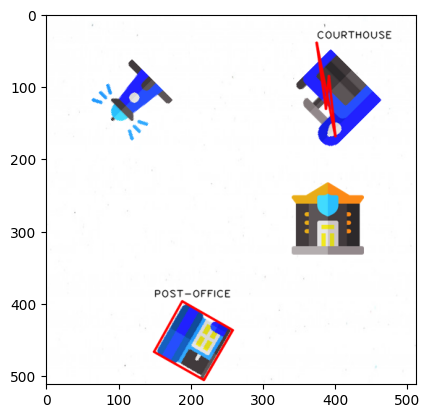

[2024-04-26 18:28:56,108]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 6/4. Finding transform...


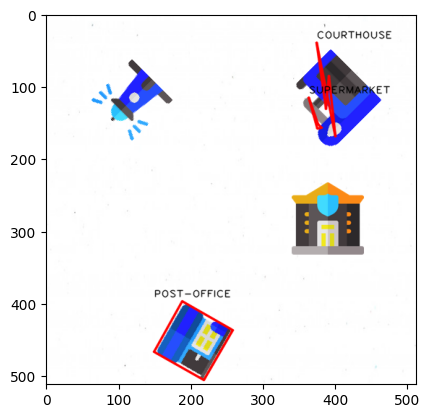

[2024-04-26 18:28:56,293]::[INFO] Query image IconDataset/png/004-bridge.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:56,324]::[INFO] No transform found.
[2024-04-26 18:28:56,475]::[INFO] Query image IconDataset/png/049-school.png yields enough good matches - 8/4. Finding transform...


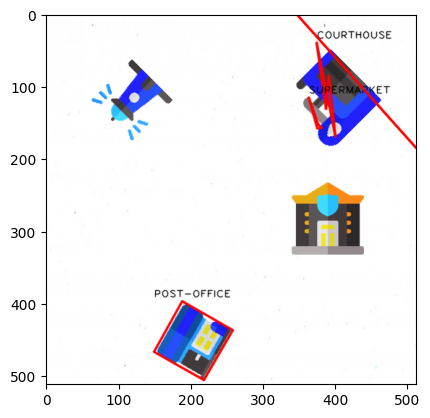

[2024-04-26 18:28:56,623]::[INFO] Query image IconDataset/png/047-restaurant.png yields enough good matches - 6/4. Finding transform...


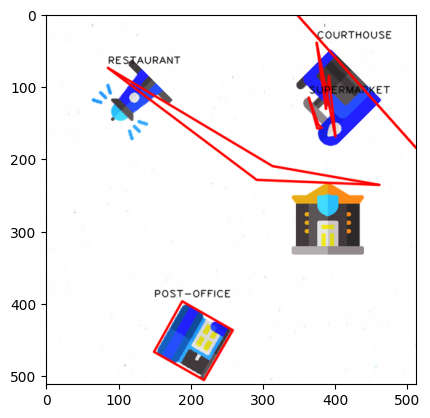

[2024-04-26 18:28:56,816]::[INFO] Query image IconDataset/png/013-water-well.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:28:56,847]::[INFO] No transform found.
[2024-04-26 18:28:56,900]::[INFO] Query image IconDataset/png/011-trash.png yields enough good matches - 7/4. Finding transform...


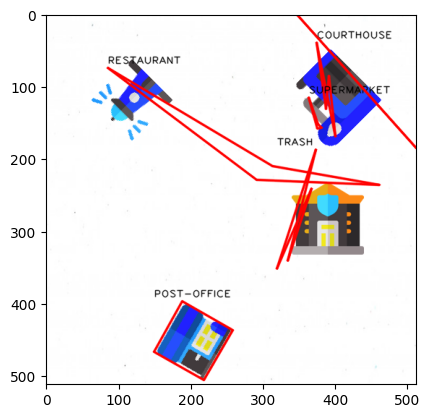

[2024-04-26 18:28:57,049]::[INFO] Query image IconDataset/png/022-car.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:57,358]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:57,389]::[INFO] No transform found.
[2024-04-26 18:28:57,471]::[INFO] Query image IconDataset/png/035-police.png yields enough good matches - 32/4. Finding transform...


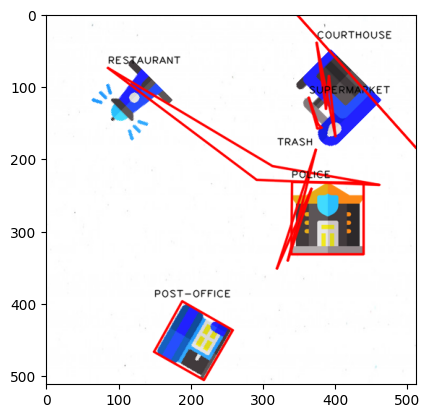

[2024-04-26 18:28:57,652]::[INFO] Query image IconDataset/png/031-field.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:57,683]::[INFO] No transform found.
[2024-04-26 18:28:57,960]::[INFO] Query image IconDataset/png/018-bank.png yields enough good matches - 11/4. Finding transform...


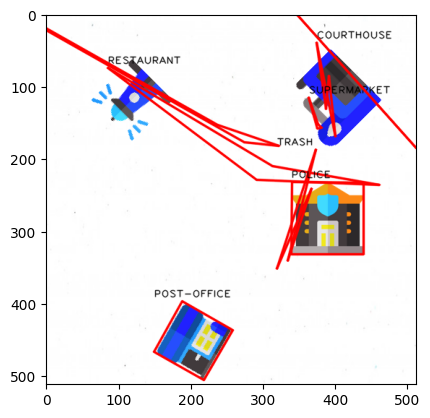

[2024-04-26 18:28:58,214]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:58,245]::[INFO] No transform found.
[2024-04-26 18:28:58,410]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 36/4. Finding transform...
[2024-04-26 18:28:58,588]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:28:58,807]::[INFO] Query image IconDataset/png/032-van.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:28:58,897]::[INFO] Query image IconDataset/png/039-university.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:58,927]::[INFO] No transform found.
[2024-04-26 18:28:59,055]::[INFO] Query image IconDataset/png/010-bench.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:28:59,131]::[INFO] Query image IconDataset/png/001-lighthouse.png yie

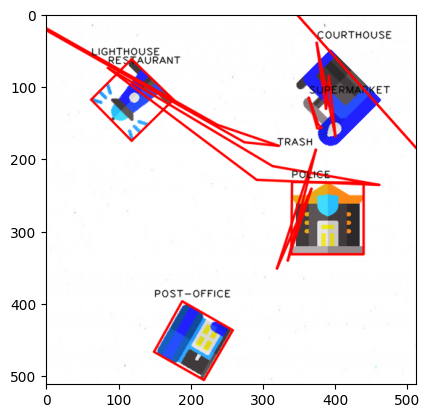

[2024-04-26 18:28:59,264]::[INFO] Query image IconDataset/png/014-flower.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:59,295]::[INFO] No transform found.
[2024-04-26 18:28:59,419]::[INFO] Query image IconDataset/png/046-fire-station.png yields enough good matches - 14/4. Finding transform...


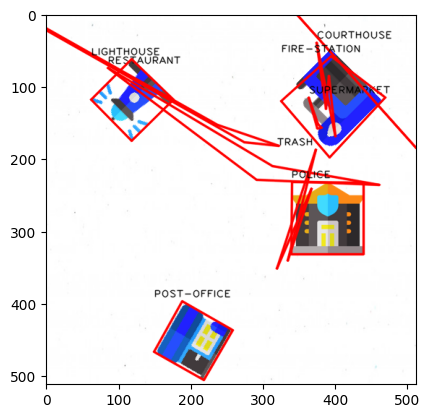

[2024-04-26 18:28:59,626]::[INFO] Query image IconDataset/png/019-prison.png yields enough good matches - 14/4. Finding transform...
[2024-04-26 18:28:59,734]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 5/4. Finding transform...


[2024-04-26 18:28:59,769]::[INFO] 16/20 - Detecting objects in test_image_14
[2024-04-26 18:28:59,858]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:28:59,889]::[INFO] No transform found.
[2024-04-26 18:28:59,953]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:29:00,070]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 17/4. Finding transform...
[2024-04-26 18:29:00,190]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:29:00,279]::[INFO] Query image IconDataset/png/006-church.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:29:00,310]::[INFO] No transform found.
[2024-04-26 18:29:00,432]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:

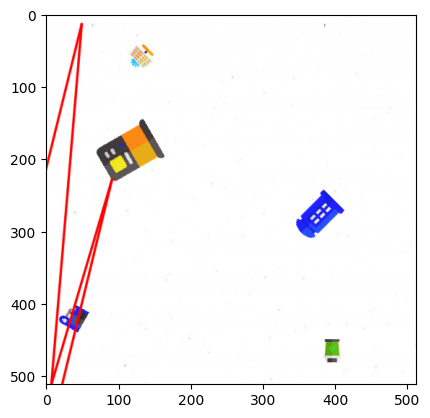

[2024-04-26 18:29:00,971]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:01,001]::[INFO] No transform found.
[2024-04-26 18:29:01,134]::[INFO] Query image IconDataset/png/029-theater.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:01,164]::[INFO] No transform found.
[2024-04-26 18:29:01,233]::[INFO] Query image IconDataset/png/049-school.png yields enough good matches - 11/4. Finding transform...
[2024-04-26 18:29:01,297]::[INFO] Query image IconDataset/png/047-restaurant.png yields enough good matches - 5/4. Finding transform...


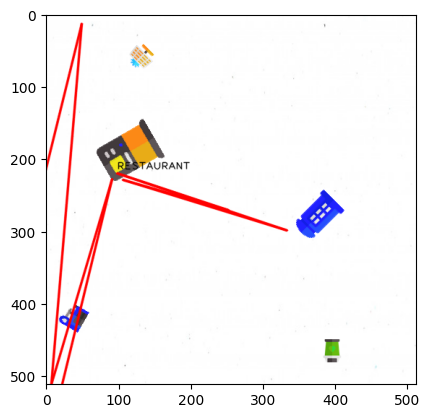

[2024-04-26 18:29:01,465]::[INFO] Query image IconDataset/png/013-water-well.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:29:01,514]::[INFO] Query image IconDataset/png/011-trash.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:01,544]::[INFO] No transform found.
[2024-04-26 18:29:01,597]::[INFO] Query image IconDataset/png/022-car.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:29:01,850]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:29:01,928]::[INFO] Query image IconDataset/png/035-police.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:29:01,988]::[INFO] Query image IconDataset/png/027-gas-station.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:02,018]::[INFO] No transform found.
[2024-04-26 18:29:02,122]::[INFO] Query image IconDataset/png/036-hotel.png yields enough go

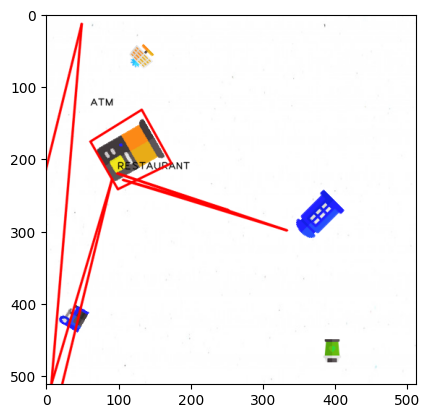

[2024-04-26 18:29:02,315]::[INFO] Query image IconDataset/png/038-library.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:29:02,465]::[INFO] Query image IconDataset/png/003-bridge-1.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:29:02,526]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:02,557]::[INFO] No transform found.
[2024-04-26 18:29:02,679]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 14/4. Finding transform...
[2024-04-26 18:29:02,851]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:29:02,969]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 42/4. Finding transform...


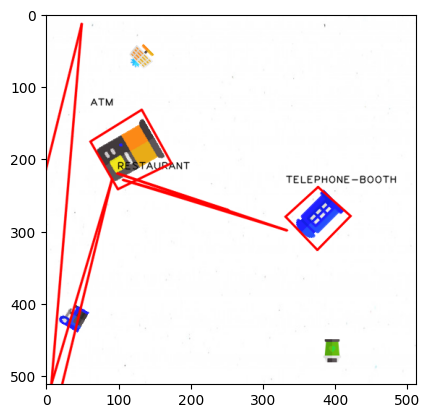

[2024-04-26 18:29:03,081]::[INFO] Query image IconDataset/png/032-van.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:29:03,136]::[INFO] Query image IconDataset/png/039-university.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:03,166]::[INFO] No transform found.
[2024-04-26 18:29:03,391]::[INFO] Query image IconDataset/png/014-flower.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:29:03,422]::[INFO] No transform found.
[2024-04-26 18:29:03,482]::[INFO] Query image IconDataset/png/005-silo.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:03,512]::[INFO] No transform found.
[2024-04-26 18:29:03,558]::[INFO] Query image IconDataset/png/046-fire-station.png yields enough good matches - 7/4. Finding transform...


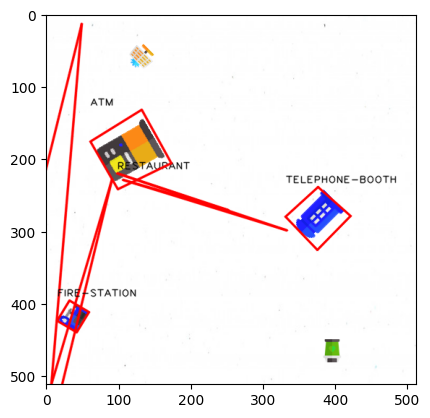

[2024-04-26 18:29:03,763]::[INFO] Query image IconDataset/png/019-prison.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:29:03,795]::[INFO] No transform found.
[2024-04-26 18:29:03,858]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 5/4. Finding transform...


[2024-04-26 18:29:03,892]::[INFO] 17/20 - Detecting objects in test_image_11
[2024-04-26 18:29:03,986]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:29:04,291]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:29:04,323]::[INFO] No transform found.
[2024-04-26 18:29:04,384]::[INFO] Query image IconDataset/png/006-church.png yields enough good matches - 14/4. Finding transform...


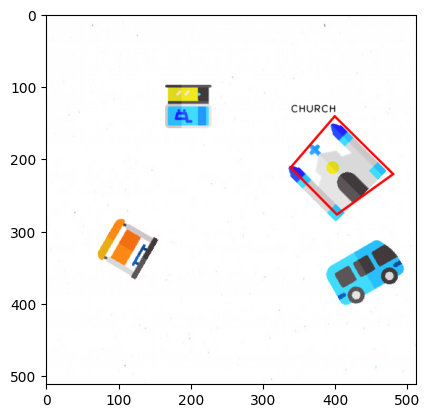

[2024-04-26 18:29:04,503]::[INFO] Query image IconDataset/png/040-bus-stop.png yields enough good matches - 10/4. Finding transform...


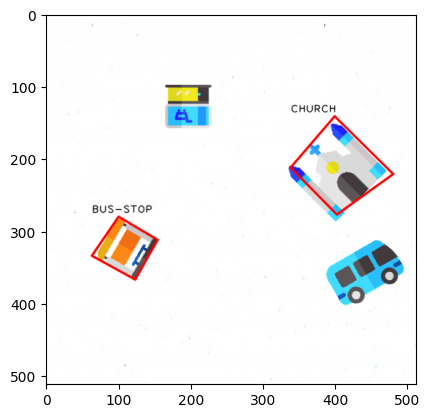

[2024-04-26 18:29:04,631]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:04,662]::[INFO] No transform found.
[2024-04-26 18:29:04,718]::[INFO] Query image IconDataset/png/012-bus.png yields enough good matches - 25/4. Finding transform...


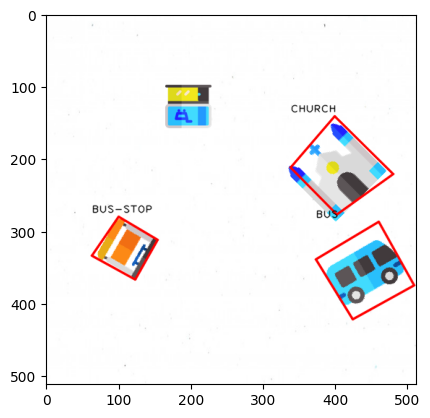

[2024-04-26 18:29:05,092]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:29:05,180]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 32/4. Finding transform...


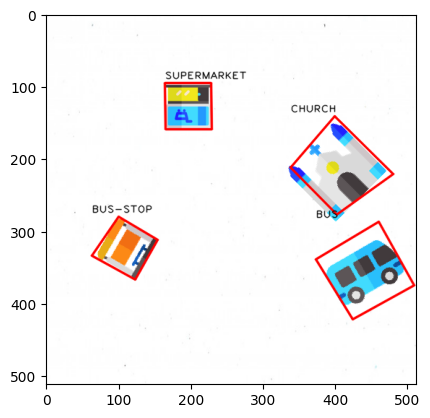

[2024-04-26 18:29:05,457]::[INFO] Query image IconDataset/png/049-school.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:29:05,555]::[INFO] Query image IconDataset/png/047-restaurant.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:29:05,678]::[INFO] Query image IconDataset/png/013-water-well.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:29:05,785]::[INFO] Query image IconDataset/png/022-car.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:29:05,927]::[INFO] Query image IconDataset/png/015-barn.png yields enough good matches - 19/4. Finding transform...
[2024-04-26 18:29:06,062]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:06,093]::[INFO] No transform found.
[2024-04-26 18:29:06,223]::[INFO] Query image IconDataset/png/027-gas-station.png yields enough good matches - 4/4. Finding transform...
[2024-04-26

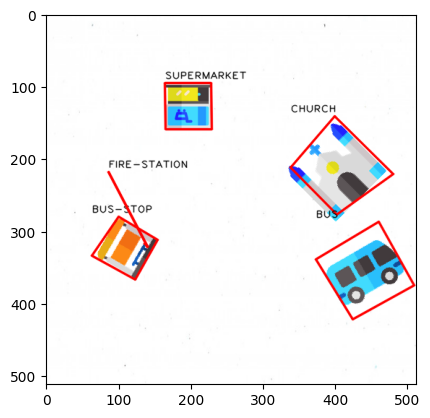

[2024-04-26 18:29:07,952]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 5/4. Finding transform...


[2024-04-26 18:29:07,987]::[INFO] 18/20 - Detecting objects in test_image_20
[2024-04-26 18:29:08,090]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:29:08,170]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 11/4. Finding transform...
[2024-04-26 18:29:08,327]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 13/4. Finding transform...
[2024-04-26 18:29:08,468]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:08,498]::[INFO] No transform found.
[2024-04-26 18:29:08,566]::[INFO] Query image IconDataset/png/006-church.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:08,596]::[INFO] No transform found.
[2024-04-26 18:29:08,743]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18

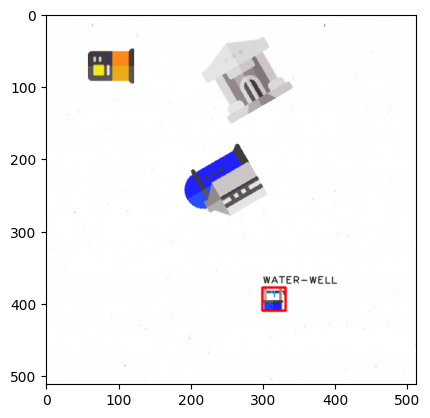

[2024-04-26 18:29:09,925]::[INFO] Query image IconDataset/png/011-trash.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:09,955]::[INFO] No transform found.
[2024-04-26 18:29:10,016]::[INFO] Query image IconDataset/png/022-car.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:29:10,247]::[INFO] Query image IconDataset/png/048-hospital.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:10,278]::[INFO] No transform found.
[2024-04-26 18:29:10,360]::[INFO] Query image IconDataset/png/024-fountain.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:29:10,446]::[INFO] Query image IconDataset/png/035-police.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:29:10,543]::[INFO] Query image IconDataset/png/027-gas-station.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:29:10,574]::[INFO] No transform found.
[2024-04-26 18:29:10,696]::[INFO] Query 

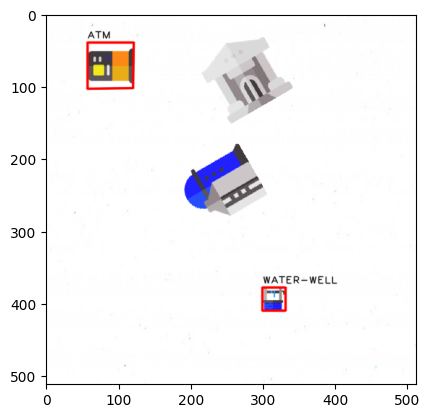

[2024-04-26 18:29:10,910]::[INFO] Query image IconDataset/png/038-library.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:29:11,009]::[INFO] Query image IconDataset/png/018-bank.png yields enough good matches - 29/4. Finding transform...


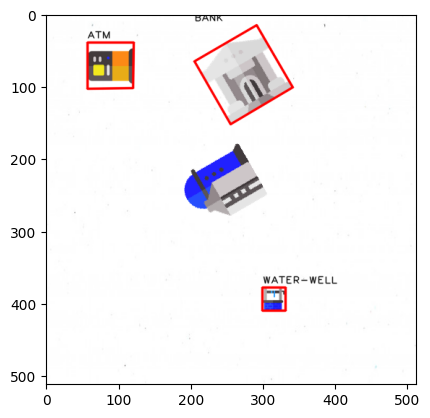

[2024-04-26 18:29:11,157]::[INFO] Query image IconDataset/png/003-bridge-1.png yields enough good matches - 12/4. Finding transform...
[2024-04-26 18:29:11,395]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 34/4. Finding transform...
[2024-04-26 18:29:11,572]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:29:11,637]::[INFO] Query image IconDataset/png/050-cemetery.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:11,668]::[INFO] No transform found.
[2024-04-26 18:29:11,752]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 16/4. Finding transform...
[2024-04-26 18:29:11,818]::[INFO] Query image IconDataset/png/032-van.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:29:11,886]::[INFO] Query image IconDataset/png/039-university.png yields enough good matches - 4/4. Finding transf

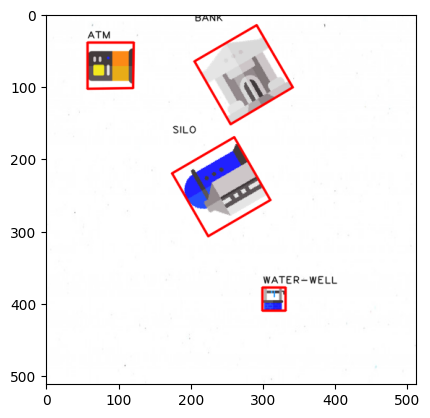

[2024-04-26 18:29:12,618]::[INFO] Query image IconDataset/png/017-cinema.png yields enough good matches - 11/4. Finding transform...


[2024-04-26 18:29:12,635]::[INFO] 19/20 - Detecting objects in test_image_7
[2024-04-26 18:29:12,828]::[INFO] Query image IconDataset/png/033-hydrant.png yields enough good matches - 9/4. Finding transform...
[2024-04-26 18:29:13,222]::[INFO] Query image IconDataset/png/006-church.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:13,253]::[INFO] No transform found.
[2024-04-26 18:29:13,647]::[INFO] Query image IconDataset/png/028-government.png yields enough good matches - 19/4. Finding transform...


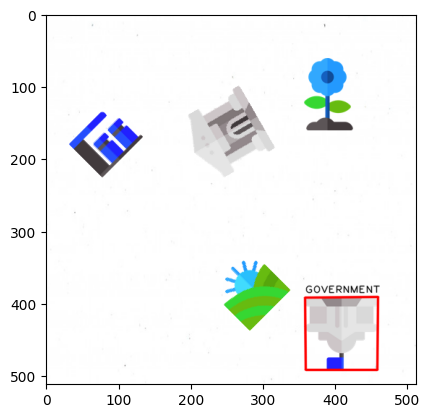

[2024-04-26 18:29:13,917]::[INFO] Query image IconDataset/png/008-courthouse.png yields enough good matches - 6/4. Finding transform...


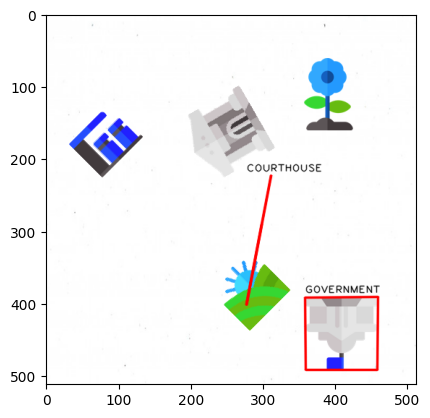

[2024-04-26 18:29:14,096]::[INFO] Query image IconDataset/png/007-supermarket.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:14,126]::[INFO] No transform found.
[2024-04-26 18:29:14,238]::[INFO] Query image IconDataset/png/004-bridge.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:29:14,322]::[INFO] Query image IconDataset/png/029-theater.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:14,352]::[INFO] No transform found.
[2024-04-26 18:29:14,448]::[INFO] Query image IconDataset/png/049-school.png yields enough good matches - 10/4. Finding transform...
[2024-04-26 18:29:14,650]::[INFO] Query image IconDataset/png/013-water-well.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:14,681]::[INFO] No transform found.
[2024-04-26 18:29:14,806]::[INFO] Query image IconDataset/png/022-car.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:29:14,982]::[INFO] Quer

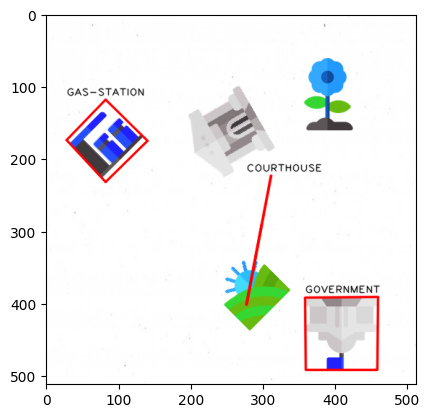

[2024-04-26 18:29:15,437]::[INFO] Query image IconDataset/png/031-field.png yields enough good matches - 14/4. Finding transform...


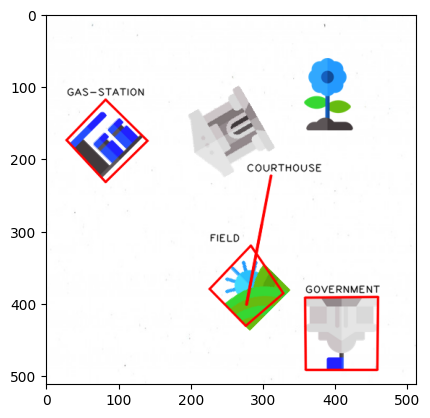

[2024-04-26 18:29:15,702]::[INFO] Query image IconDataset/png/038-library.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:29:15,833]::[INFO] Query image IconDataset/png/018-bank.png yields enough good matches - 38/4. Finding transform...


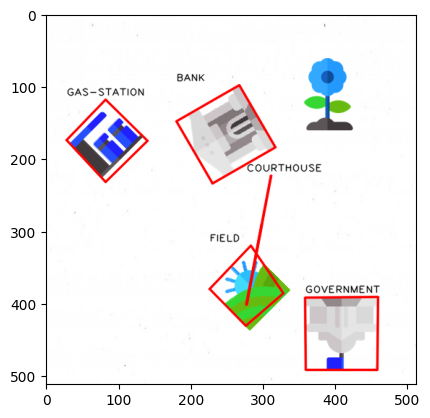

[2024-04-26 18:29:15,994]::[INFO] Query image IconDataset/png/003-bridge-1.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:29:16,106]::[INFO] Query image IconDataset/png/034-billboard.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:16,136]::[INFO] No transform found.
[2024-04-26 18:29:16,514]::[INFO] Query image IconDataset/png/044-ferris-wheel.png yields enough good matches - 8/4. Finding transform...
[2024-04-26 18:29:16,699]::[INFO] Query image IconDataset/png/030-telephone-booth.png yields enough good matches - 5/4. Finding transform...
[2024-04-26 18:29:16,731]::[INFO] No transform found.
[2024-04-26 18:29:17,091]::[INFO] Query image IconDataset/png/001-lighthouse.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:17,123]::[INFO] No transform found.
[2024-04-26 18:29:17,208]::[INFO] Query image IconDataset/png/014-flower.png yields enough good matches - 26/4. Finding transform...


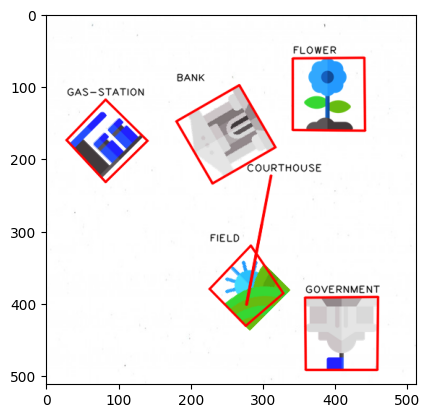

[2024-04-26 18:29:17,507]::[INFO] Query image IconDataset/png/005-silo.png yields enough good matches - 8/4. Finding transform...


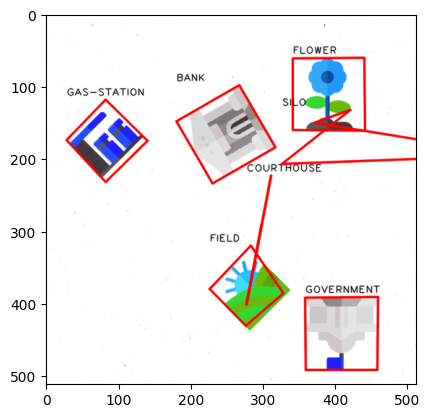

[2024-04-26 18:29:17,897]::[INFO] 20/20 - Detecting objects in test_image_8
[2024-04-26 18:29:18,004]::[INFO] Query image IconDataset/png/009-airport.png yields enough good matches - 6/4. Finding transform...
[2024-04-26 18:29:18,214]::[INFO] Query image IconDataset/png/041-windmill.png yields enough good matches - 23/4. Finding transform...


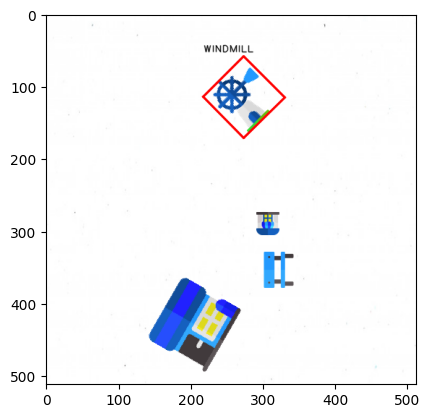

[2024-04-26 18:29:18,411]::[INFO] Query image IconDataset/png/037-post-office.png yields enough good matches - 31/4. Finding transform...


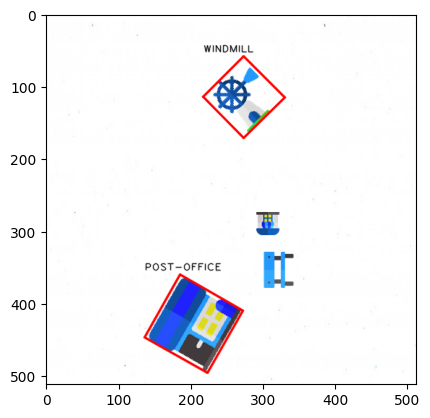

[2024-04-26 18:29:18,689]::[INFO] Query image IconDataset/png/026-shop.png yields enough good matches - 15/4. Finding transform...


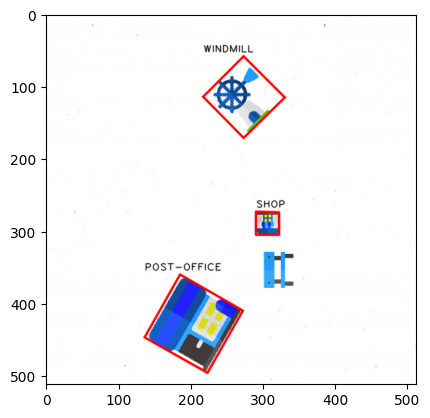

[2024-04-26 18:29:18,822]::[INFO] Query image IconDataset/png/012-bus.png yields enough good matches - 7/4. Finding transform...
[2024-04-26 18:29:19,454]::[INFO] Query image IconDataset/png/029-theater.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:19,483]::[INFO] No transform found.
[2024-04-26 18:29:19,643]::[INFO] Query image IconDataset/png/047-restaurant.png yields enough good matches - 4/4. Finding transform...
[2024-04-26 18:29:19,673]::[INFO] No transform found.
[2024-04-26 18:29:20,958]::[INFO] Query image IconDataset/png/021-solar-panel.png yields enough good matches - 29/4. Finding transform...
[2024-04-26 18:29:21,519]::[INFO] Query image IconDataset/png/010-bench.png yields enough good matches - 7/4. Finding transform...


In [32]:
params = {"sift_n_features": 0,
 "sift_n_octave_layers": 3, 
 "sift_contrast_threshold": 0.005, 
 "sift_edge_threshold": 11.777774652601527, 
 "sift_sigma": 1.8071337661481155, 
 "ransac_reproj_threshold": 1.0, 
 "ransac_min_datapoints": 4, 
 "ransac_inliers_threshold": 0, 
 "ransac_confidence": 0.9, 
 "lowe_threshold": 0.5,
 "min_match_count": 4}

sift_hps = {
        'nfeatures': params['sift_n_features'],
        'nOctaveLayers': params['sift_n_octave_layers'],
        'contrastThreshold': params['sift_contrast_threshold'],
        'edgeThreshold': params['sift_edge_threshold'],
        'sigma': params['sift_sigma'],
    }

ransac_hps = {
    'inliers_threshold': params['ransac_inliers_threshold'],
    'min_datapoints': params['ransac_min_datapoints'],
    'reproj_threshold': params['ransac_reproj_threshold'],
    'confidence': params['ransac_confidence']
}

lowe_ratio = params['lowe_threshold']
min_match_count = params['min_match_count']

metrics = task3.detect_on_dataset(test_images, query_images, ANNOTATIONS_DIR, sift_hps, ransac_hps, lowe_ratio, min_match_count, verbose=True, draw=True)
# metrics = task3.detect_on_dataset(test_images, query_images, ANNOTATIONS_DIR)

In [16]:
metrics

(0.65, 0.9400000000000001, 0.375, 0.01)

In [5]:
metrics

(0.8150000000000001, 0.945, 0.19166666666666665, 0.05500000000000001)